In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [168]:
np.random.seed(123)
df = pd.DataFrame(np.random.randint(0, 100, size=(100000, 4)), columns=['g1', 'g2', 'g3', 'g4'])

In [145]:
df

,g1,g2,g3,g4
0,66,92,98,17
1,83,57,86,97
2,96,47,73,32
3,46,96,25,83
4,78,36,96,80
...,...,...,...,...
995,54,72,59,82
996,96,81,25,61
997,38,32,77,51
998,33,22,31,70


# Выборочное среднее / матожидание

In [146]:
df.mean()

g1    48.929
g2    48.629
g3    50.630
g4    49.862
dtype: float64

# Медиана

In [147]:
df.median()

g1    48.0
g2    48.0
g3    51.0
g4    50.0
dtype: float64

# Дисперсия

In [148]:
df.var()

g1    799.883843
g2    870.786145
g3    852.027127
g4    832.083039
dtype: float64

# Стандартное отклонение / среднеквадратическое отклонение

In [149]:
df.std()

g1    28.282218
g2    29.509086
g3    29.189504
g4    28.845850
dtype: float64

# Мода

In [150]:
df.g1.mode()

0    22
dtype: int64

# Размах

In [151]:
def st_range(df, name):
    """
    Вычисление размаха - разность максимального и минимального значения признака
    """
    return df[name].max() - df[name].min()

# Квантили / квартили

In [152]:
df.quantile(0.5)

g1    48.0
g2    48.0
g3    51.0
g4    50.0
Name: 0.5, dtype: float64

# Z-стандартизация для дф

In [153]:
df_z = pd.DataFrame(stats.zscore(df), columns=['g1', 'g2', 'g3', 'g4'])

In [154]:
df_z

,g1,g2,g3,g4
0,0.603897,1.470486,1.623656,-1.139798
1,1.205282,0.283817,1.212343,1.634952
2,1.665165,-0.055231,0.766755,-0.619532
3,-0.103615,1.606105,-0.878495,1.149371
4,1.028404,-0.428184,1.555104,1.045318
...,...,...,...,...
995,0.179390,0.792390,0.286890,1.114687
996,1.665165,1.097533,-0.878495,0.386315
997,-0.386620,-0.563803,0.903859,0.039471
998,-0.563498,-0.902852,-0.672839,0.698474


# Z-значение для отдельного значения

In [155]:
def z_scr_v(value, mean, sd):
    return (value - mean) / sd

# Z-статистика для оценки среднего при многократных выборках

In [156]:
def z_scr_mean(mean, mean_gs, sem):
    return (mean - mean_gs) / sem

# Стандартная ошибка среднего

In [157]:
df.sem()

g1    0.894362
g2    0.933159
g3    0.923053
g4    0.912186
dtype: float64

# Доверительные интервалы

In [158]:
def conf_int(df, name, acc=95):
    """
    Рассчет доверительного интервала для среднего значения.
    Можно рассчитать 95%(по умолчанию) и 99% интервал.
    """
    if acc == 99:
        return df[name].mean() - df[name].sem() * 2.58, df[name].mean() + df[name].sem() * 2.58
    elif acc == 95:
        return df[name].mean() - df[name].sem() * 1.96, df[name].mean() + df[name].sem() * 1.96
    else:
        print('Рассчитываются только 95% и 99% интервалы, проверьте ввод')

In [159]:
conf_int(df, 'g1', 95)

(47.176049980557046, 50.68195001944296)

In [160]:
df.g1.mean() - df.g1.sem() * 1.96

47.176049980557046

# P-value for Z-score (односторонний и двухсторонний интервал)

In [163]:
def find_pval_zscore_single(df, name, value):
    z_value = z_scr_v(value, df[name].mean(), df[name].std())
    return stats.norm.sf(abs(z_value))

In [164]:
def find_pval_zscore_double(df, name, value):
    z_value = z_scr_v(value, df[name].mean(), df[name].std())
    return stats.norm.sf(abs(z_value))*2

# Генерация нормального распределения

In [243]:
df_norm = pd.DataFrame(stats.norm(loc=2, scale=1).rvs(size=10000))

In [244]:
df_norm

,0
0,2.130720
1,3.054488
2,4.055368
3,2.930080
4,1.345107
...,...
9995,1.868538
9996,2.436459
9997,1.409902
9998,2.327947


In [256]:
find_pval_zscore_double(df_norm, 0, 4)

0.04611279243416529

[]

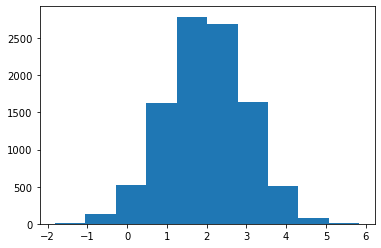

In [246]:
plt.hist(df_norm)
plt.plot()

# Расчет степеней свободы

In [263]:
def calc_df(sample, groups=1):
    """
    Расчет степеней свободы для выборки. По умолчанию - для одной группы,
    при наличии большего количества групп указать второй аргумент
    """
    return sample.size - groups

# T-критерий. Сравнение двух средних

In [273]:
def t_criteria(sample1, sample2, general_mean1, general_mean2):
    a = ((sample1.mean() - sample2.mean()) - (general_mean1 - general_mean2))
    b = (sample1.std() ** 2 / sample1.size + sample2.std() ** 2 / sample2.size) ** 0.5
    return a / b

In [272]:
a = (89.9 - 80.7) - (0 - 0)
b = (11.3 ** 2 / 20 + 11.7 ** 2 / 20) ** 0.5
a / b

2.529439633102561

In [275]:
def t_criteria_test(sample1_mean, sample2_mean, general_mean1, general_mean2, sd1, sd2, size1, size2):
    a = ((sample1_mean - sample2_mean) - (general_mean1 - general_mean2))
    b = (sd1 ** 2 / size1 + sd2 ** 2 / size2) ** 0.5
    return a / b

In [276]:
t_criteria_test(89.9, 80.7, 0, 0, 11.3, 11.7, 20, 20)

2.529439633102561

# One-way ANOVA

## Prepare data

,value,group
0,100.854249,a
1,100.234075,a
2,104.784430,a
3,96.000634,a
4,101.818600,a


# Algorithm

In [189]:
def one_way_anova(df, group):
    """
    Аргументы: df - выборка, имеющая разделение на группы, 
    group - столбец, определяющий группу
    
    Производится сравнение нескольких групп между собой.
    H0 - средние в группах не отличаются
    H1 - хотя бы одно среднее значительно отличается
    
    Вывод: f-value, p-value(т.е. P(>f))
    """
    df_bg = len(df[group].unique()) - 1
    df_wg = len(df[group]) - df_bg - 1

        # Вычисляем размеры и количество групп
    group_sizes = []
    groups = df[group].unique()
    for gr in groups:
        group_sizes.append(df[df[group] == gr])
    for gr in group_sizes:
        gr.index = range(0, len(gr))
    means = []
    for gr in group_sizes:
        means.append(gr.mean())
    average = sum(means) / len(means)
    ssb = 0
    for i in range(len(means)):
        ssb += (means[i].value - average) ** 2 * len(group_sizes[i])
    ms_bg = ssb / df_bg
    ssw = 0
    for i in range(len(group_sizes)):
        for j in range(len(group_sizes[i])):
            ssw += (group_sizes[i].value[j] - means[i]) ** 2
    ms_wg = ssw / df_wg
    f_value = ms_bg / ms_wg
    p_value = round(1 - stats.f.cdf(f_value, df_bg, df_wg)[0], 5)
    return f_value, p_value

In [190]:
one_way_anova(df, 'group')

(value    11.09824
 dtype: float64,
 1e-05)

# Two-way ANOVA

# Generate data

In [5]:
from scipy import stats
df_a = pd.DataFrame(stats.norm(loc=104.8, scale=5.8).rvs(size=16))
df_a['group1'] = 'y'
df_a['group2'] = 'high'

In [6]:
df_b = pd.DataFrame(stats.norm(loc=105.5, scale=4.4).rvs(size=16))
df_b['group1'] = 'y'
df_b['group2'] = 'low'

In [7]:
df_c = pd.DataFrame(stats.norm(loc=101, scale=5.1).rvs(size=16))
df_c['group1'] = 'o'
df_c['group2'] = 'high'

In [8]:
df_d = pd.DataFrame(stats.norm(loc=102.3, scale=5.1).rvs(size=16))
df_d['group1'] = 'o'
df_d['group2'] = 'low'

In [11]:
import pandas as pd
df_test = pd.concat([df_a, df_b, df_c, df_d], ignore_index=True)
two_way_clinic = df_test
two_way_clinic.to_csv('2way_clinic.csv', index = False)

## Третье значение - взаимодействие факторов

In [697]:
groups = ['group1', 'group2']
df_first = len(df_test[groups[0]].unique()) - 1

df_second = len(df_test[groups[1]].unique()) - 1

df_third = 1

first_group = df_test['group1'].unique()
second_group = df_test['group2'].unique()
average1 = []
average2 = []
average3 = []
group_sizes1 = []
group_sizes2 = []
group_sizes3 = []
for val in first_group:
    average1.append(df_test[df_test['group1'] == val].mean())
    group_sizes1.append(len(df_test[df_test['group1'] == val]))
average_global1 = sum(average1) / len(average1)

for val in second_group:
    average2.append(df_test[df_test['group2'] == val].mean())
    group_sizes2.append(len(df_test[df_test['group2'] == val]))
average_global2 = sum(average2) / len(average2)

average3 = []
for gr in first_group:
    for val in second_group:
        average3.append(df_test[(df_test['group1'] == gr) & (df_test['group2'] == val)].mean())
        group_sizes3.append(len(df_test[(df_test['group1'] == gr) & (df_test['group2'] == val)]))
average_global3 = sum(average3) / len(average3)

ssb1 = 0
ssb1 = group_sizes1[0] * (average1[0][0] - average_global1[0]) ** 2
ssb1 += group_sizes1[1] * (average1[1][0] - average_global1[0]) ** 2
ms_bg1 = ssb1 / df_first

ssb2 = 0
ssb2 = group_sizes2[0] * (average2[0][0] - average_global2[0]) ** 2
ssb2 += group_sizes2[1] * (average2[1][0] - average_global2[0]) ** 2
ms_bg2 = ssb2 / df_second

ssb3 = 0
for i in range(4):
    ssb3 += group_sizes3[i] * (average3[i] - average_global3) ** 2
ssb3 = ssb3[0]
ms_bg3 = ssb3 / df_third


def_global = len(df_test) - len(group_sizes1) - len(group_sizes2)

variances = []
group_sizes_global = []
for val in first_group:
    for gr in second_group:
        variances.append(df_test[(df_test['group1'] == val) & (df_test['group2'] == gr)].var())
        group_sizes_global.append(len(df_test[(df_test['group1'] == val) & (df_test['group2'] == gr)]))
variances = np.array(variances)

ssw = 0
for i in range(len(group_sizes_global)):
    ssw += (group_sizes_global[i] - 1) * variances[i]
ssw = ssw[0]
ms_wg = ssw / def_global

f_first = ms_bg1 / ms_wg
f_second = ms_bg2 / ms_wg
f_third = ms_bg3 / ms_wg
p_value1 = round(1 - stats.f.cdf(f_first, df_first, def_global), 5)
p_value2 = round(1 - stats.f.cdf(f_second, df_second, def_global), 5)
p_value3 = round(1 - stats.f.cdf(f_third, df_third, def_global), 5)


0.0024

In [698]:
p_value1

0.00656

In [699]:
p_value2

0.20257

In [700]:
p_value3

0.0024

# Корреляция и регрессия

In [702]:
df

,g1,g2,g3,g4,group
0,66,92,98,17,a
1,83,57,86,97,a
2,96,47,73,32,a
3,46,96,25,83,a
4,78,36,96,80,a
...,...,...,...,...,...
99995,2,51,25,32,a
99996,70,46,21,30,a
99997,4,13,33,7,a
99998,84,7,7,5,a


In [707]:
df_test

,0,group1,group2
0,115.197641,y,high
1,92.527394,y,high
2,99.630926,y,high
3,105.040992,y,high
4,109.853466,y,high
...,...,...,...
59,99.129215,o,low
60,102.737075,o,low
61,102.544033,o,low
62,102.528075,o,low


In [708]:
np.random.seed(123)
df = pd.DataFrame(np.random.randint(0, 100, size=(1000, 4)), columns=['g1', 'g2', 'g3', 'g4'])

In [709]:
df

,g1,g2,g3,g4
0,66,92,98,17
1,83,57,86,97
2,96,47,73,32
3,46,96,25,83
4,78,36,96,80
...,...,...,...,...
995,54,72,59,82
996,96,81,25,61
997,38,32,77,51
998,33,22,31,70


In [715]:
df.corr()

,g1,g2,g3,g4
g1,1.000000,-0.004701,-0.006764,0.004172
g2,-0.004701,1.000000,0.008594,0.003175
g3,-0.006764,0.008594,1.000000,-0.033926
g4,0.004172,0.003175,-0.033926,1.000000


In [718]:
df.g1.corr(df.g2)

-0.004700871123791447

In [720]:
stats.pearsonr(df.g1, df.g1)

(1.0, 0.0)

# Одномерный регрессионный анализ

In [721]:
x = np.array([-0.5, 1.2, 0.7, -1.5, -2.2, -0.5, 1.8, 0.3, -0.8, 1])
y = np.array([-0.5, 1, 0.8, -1, -1.5, -0.7, 2, 0.5, -1.2, 1.3])

In [722]:
x.mean()

-0.050000000000000024

In [723]:
x.var()

1.4465

In [732]:
def my_var(x):
    res = 0
    for val in x:
        res += (val - x.mean()) ** 2
    res = res / (len(x) - 1)
    return res

In [733]:
my_var(x)

1.6072222222222226

In [734]:
my_var(y)

1.4401111111111113

In [735]:
np.cov(x, y)

array([[1.60722222, 1.46722222],
       [1.46722222, 1.44011111]])

In [748]:
def my_cov(x, y):
    res = 0
    for i in range(len(x)):
        res += (x[i] - x.mean()) * (y[i] - y.mean())
    res /= (len(x) - 1)
    return res

In [750]:
my_cov(x, y) / (my_var(x) ** 0.5 * my_var(y) ** 0.5)

0.964406061262968

In [753]:
df = pd.read_csv('test.csv')

In [38]:
head = ["state","metro_res","white","hs_grad","poverty","female_house"]
data = [
["Alabama",55.4,71.3,79.9,14.6,14.2],
["Alaska",65.6,70.8,90.6,8.3,10.8],
["Arizona",88.2,87.7,83.8,13.3,11.1],
["Arkansas",52.5,81,80.9,18,12.1],
["California",94.4,77.5,81.1,12.8,12.6],
["Colorado",84.5,90.2,88.7,9.4,9.6],
["Connecticut",87.7,85.4,87.5,7.8,12.1],
["Delaware",80.1,76.3,88.7,8.1,13.1],
["District  of Columbia",100,36.2,86,16.8,18.9],
["Florida",89.3,80.6,84.7,12.1,12],
["Georgia",71.6,67.5,85.1,12.1,14.5],
["Hawaii",91.5,25.9,88.5,10.6,12.4],
["Idaho",66.4,95.5,88.2,11.8,8.7],
["Illinois",87.8,79.5,85.9,11.2,12.3],
["Indiana",70.8,88.9,86.4,8.7,11.1],
["Iowa",61.1,94.9,89.7,8.3,8.6],
["Kansas",71.4,89.3,88.6,9.4,9.3],
["Kentucky",55.8,90.3,82.8,13.1,11.8],
["Louisiana",72.6,64.2,79.8,17,16.6],
["Maine",40.2,97.1,86.6,11.3,9.5],
["Maryland",86.1,65.6,87.6,7.3,14.1],
["Massachusetts",91.4,87.2,87.1,9.6,11.9],
["Michigan",74.7,81.5,87.6,10.3,12.5],
["Minnesota",70.9,90.2,91.6,6.5,8.9],
["Mississippi",48.8,61.2,81.2,17.6,17.3],
["Missouri",69.4,85.3,88.3,9.6,11.6],
["Montana",54.1,90.9,90.1,13.7,8.9],
["Nebraska",69.8,92.1,90.8,9.5,9.1],
["Nevada",91.5,84.1,85.6,8.3,11.1],
["New  Hampshire",59.3,96.3,92.1,5.6,9.1],
["New Jersey",94.4,77.3,86.2,7.8,12.6],
["New Mexico",75,84.9,81.7,17.8,13.2],
["New York",87.5,73.6,84.2,14,14.7],
["North  Carolina",60.2,74.1,81.4,13.1,12.5],
["North Dakota",55.9,92.5,89.7,11.9,7.8],
["Ohio",77.4,85.4,87.2,10.1,12.1],
["Oklahoma",65.3,78.4,85.7,14.7,11.4],
["Oregon",78.7,90.8,86.9,11.2,9.8],
["Pennsylvania",77.1,86.4,86,9.2,11.6],
["Rhode Island",90.9,89.2,81,10.3,12.9],
["South  Carolina",60.5,67.7,80.8,13.5,14.8],
["South Dakota",51.9,88.8,88.7,10.2,9],
["Tennessee",63.6,80.8,81,14.2,12.9],
["Texas",82.5,83.6,77.2,15.3,12.7],
["Utah",88.2,93.6,89.4,9.3,9.4],
["Vermont",38.2,96.9,88.9,9.9,9.3],
["Virginia",73,73.9,87.8,8.7,11.9],
["Washington",82,85.5,89.1,10.8,9.9],
["West  Virginia",46.1,95,78.7,16,10.7],
["Wisconsin",68.3,90.1,88.6,8.6,9.6],
["Wyoming",65.1,94.7,90.9,9.5,8.7]]
df = pd.DataFrame(data, columns=head)      


'Arizona'

In [797]:
a = df['female_house'].std()
a

2.356155059979429

In [798]:
b = df.poverty.std()
b

3.099185218667617

In [799]:
corr = np.corrcoef(df['female_house'], df.poverty)
corr

array([[1.        , 0.52539698],
       [0.52539698, 1.        ]])

In [800]:
b/a * 0.52

0.6839856769533798

In [804]:
g_t = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [4.6, 0.1, 0.2, 4.2, 2.7, 4.5, 1.5, 5.1, 2.2, 1], [7, 1, 0, 2, 2, 9, 1, 8, 4, 1]])

In [805]:
g_t

array([[1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [4.6, 0.1, 0.2, 4.2, 2.7, 4.5, 1.5, 5.1, 2.2, 1. ],
       [7. , 1. , 0. , 2. , 2. , 9. , 1. , 8. , 4. , 1. ]])

In [806]:
x_t = np.array([7.3, 1.3, 0.3, 5.4, 2.1, 9.8, 2.1, 9.1, 3.5, 2.3])

In [807]:
x_t

array([7.3, 1.3, 0.3, 5.4, 2.1, 9.8, 2.1, 9.1, 3.5, 2.3])

In [808]:
g = g_t.transpose()

In [809]:
g

array([[1. , 4.6, 7. ],
       [1. , 0.1, 1. ],
       [1. , 0.2, 0. ],
       [1. , 4.2, 2. ],
       [1. , 2.7, 2. ],
       [1. , 4.5, 9. ],
       [1. , 1.5, 1. ],
       [1. , 5.1, 8. ],
       [1. , 2.2, 4. ],
       [1. , 1. , 1. ]])

In [810]:
x = x_t.transpose()
x

array([7.3, 1.3, 0.3, 5.4, 2.1, 9.8, 2.1, 9.1, 3.5, 2.3])

In [811]:
ggt = g_t.dot(g)

In [812]:
ggt

array([[ 10.  ,  26.1 ,  35.  ],
       [ 26.1 , 100.49, 138.7 ],
       [ 35.  , 138.7 , 221.  ]])

In [814]:
ggtmin = np.linalg.matrix_power(ggt, -1)

In [815]:
ggtmin

array([[ 0.3139094 , -0.09654199,  0.01087577],
       [-0.09654199,  0.10408697, -0.05003572],
       [ 0.01087577, -0.05003572,  0.03420499]])

In [817]:
first = ggtmin.dot(g_t)

In [818]:
final = first.dot(x_t)

In [819]:
final

array([0.24029487, 0.73610941, 0.61670274])

In [122]:
model, group = mult_linregr(df, ['metro_res', 'white', 'hs_grad', 'female_house'], 'poverty')
test_model(df, 'poverty', model, group, 0.1)

F = 20.5787 > F_cr = 2.0712 : passed
R_2adj = 0.6187 : passed
